## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Almabetter/EDA capstone project hotel booking analysis/Hotel Bookings.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.shape

(119390, 32)

In [15]:
#Checking for null values.
null_count=df.isnull().sum().reset_index().rename(columns={'index':'column',0:'null count'}).sort_values('null count',ascending=False)
null_count

,column,null count
24,company,112593
23,agent,16340
13,country,488
10,children,4
19,reserved_room_type,0
20,assigned_room_type,0
21,booking_changes,0
22,deposit_type,0
0,hotel,0
17,previous_cancellations,0


In [17]:
#Finding percentage of null values.
null_count['null_percentage']=round(null_count['null count']/df['hotel'].count(),2)*100
null_count

,column,null count,null_percentage
24,company,112593,94.0
23,agent,16340,14.0
13,country,488,0.0
10,children,4,0.0
19,reserved_room_type,0,0.0
20,assigned_room_type,0,0.0
21,booking_changes,0,0.0
22,deposit_type,0,0.0
0,hotel,0,0.0
17,previous_cancellations,0,0.0


94% of the values for the column company are null.Null values for all the other columns are less than 15%.

In [23]:
#dropping the company column.
df=df.drop('company',axis=1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


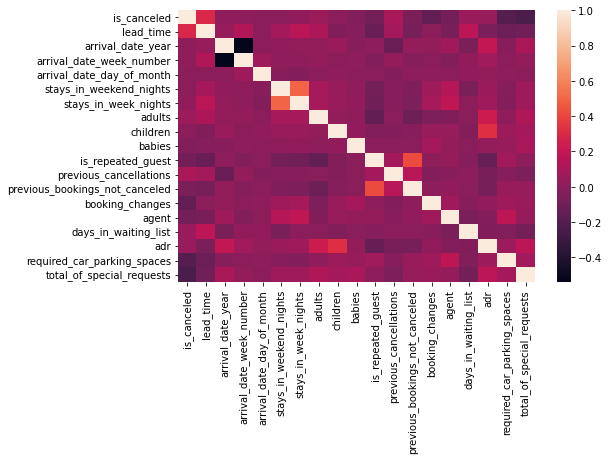

In [32]:
 #Finding general correlation
 plt.figure(figsize=(8,5))
sns.heatmap(df.corr())

In [33]:
#To find out the number of bookings in different types of hotel.
booking_by_hotel_type=df["hotel"].value_counts().reset_index().rename(columns={'index':'Hotel','hotel':'Count'})
booking_by_hotel_type

,Hotel,Count
0,City Hotel,79330
1,Resort Hotel,40060


Text(0.5, 0, 'Number of bookings')

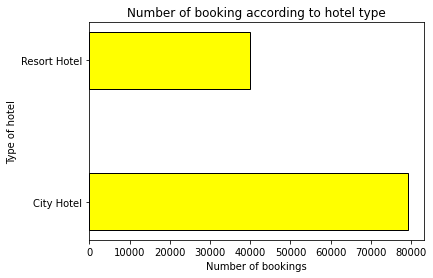

In [11]:
# plotting a bar chart to compare number of bookings made in each type of hotel
plt.barh(booking_by_hotel_type['Hotel'],booking_by_hotel_type['Count'],color='yellow',height=0.4,edgecolor='black')
plt.title('Number of booking according to hotel type')
plt.ylabel('Type of hotel')
plt.xlabel('Number of bookings')


In [ ]:
#Finding the ratio between the number of bookings made in city hotel and resort hotel.
ratio_hotel=round(booking_by_hotel_type.loc[0]['Count']/booking_by_hotel_type.loc[1]['Count'],2)
print(ratio_hotel)

1.98


Text(0.5, 1.0, 'percentage of hotel types')

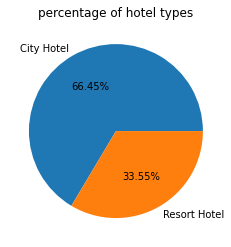

In [42]:
#plotting the above data in a pie chart.
plt.pie(booking_by_hotel_type['Count'],labels=booking_by_hotel_type['Hotel'],autopct='%1.2f%%')
plt.title('percentage of hotel types')

People prefer City Hotel than a Resort Hotel by far(almost double).

In [24]:
#To find the number of bookings made in different months of each year
booking_by_time_of_the_year = df.groupby(['arrival_date_month','arrival_date_year'])['arrival_date_month'].count().unstack()
booking_by_time_of_the_year=booking_by_time_of_the_year.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
booking_by_time_of_the_year


arrival_date_year,2015,2016,2017
arrival_date_month,,,
January,NaN,2248.0,3681.0
February,NaN,3891.0,4177.0
March,NaN,4824.0,4970.0
April,NaN,5428.0,5661.0
May,NaN,5478.0,6313.0
June,NaN,5292.0,5647.0
July,2776.0,4572.0,5313.0
August,3889.0,5063.0,4925.0
September,5114.0,5394.0,NaN


In [25]:
#To find the median of bookings made in year 2015 and 2017.
booking_2015_median = booking_by_time_of_the_year[2015].median()
booking_2017_median = booking_by_time_of_the_year[2017].median()
#Filling the missing values with median for respective year.
modified_booking_by_time_of_the_year=booking_by_time_of_the_year.fillna(value={2015:booking_2015_median,2017:booking_2017_median})
modified_booking_by_time_of_the_year

arrival_date_year,2015,2016,2017
arrival_date_month,,,
January,3404.5,2248.0,3681.0
February,3404.5,3891.0,4177.0
March,3404.5,4824.0,4970.0
April,3404.5,5428.0,5661.0
May,3404.5,5478.0,6313.0
June,3404.5,5292.0,5647.0
July,2776.0,4572.0,5313.0
August,3889.0,5063.0,4925.0
September,5114.0,5394.0,5141.5


Text(0, 0.5, 'Number of bookings')

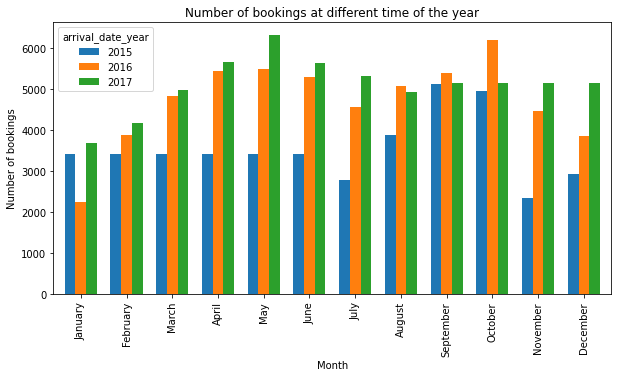

In [30]:
#Plotting a bar chart to show the number of bookings made in different months of each year.
modified_booking_by_time_of_the_year.plot(kind='bar',width=0.7)
plt.title('Number of bookings at different time of the year')
plt.xlabel('Month')
plt.ylabel('Number of bookings')



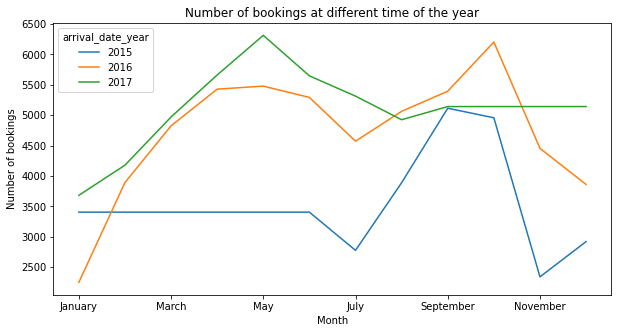

In [29]:
#Plotting a line graph to show the variation in number of bookings in different months.
modified_booking_by_time_of_the_year.plot()
plt.title('Number of bookings at different time of the year')
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.rcParams['figure.figsize'] = (10, 5)



*   Number of bookings at the same time of the year has been on a rise with each passing year.
*   Each year sees a high number of booking around may and october.



In [31]:
#To find the total number of bookings in each month across all the three years.
booking_by_month =df['arrival_date_month'].value_counts()
booking_by_month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

This doesn't provide a clear insight as data for some months are missing.

In [32]:
#Calculating the number of bookings by using median instead of missing values.
modified_booking_by_time_of_the_year['total']=modified_booking_by_time_of_the_year[2015]+modified_booking_by_time_of_the_year[2016]+modified_booking_by_time_of_the_year[2017]
modified_booking_by_time_of_the_year= modified_booking_by_time_of_the_year.reset_index()
modified_booking_by_time_of_the_year


arrival_date_year,arrival_date_month,2015,2016,2017,total
0,January,3404.5,2248.0,3681.0,9333.5
1,February,3404.5,3891.0,4177.0,11472.5
2,March,3404.5,4824.0,4970.0,13198.5
3,April,3404.5,5428.0,5661.0,14493.5
4,May,3404.5,5478.0,6313.0,15195.5
5,June,3404.5,5292.0,5647.0,14343.5
6,July,2776.0,4572.0,5313.0,12661.0
7,August,3889.0,5063.0,4925.0,13877.0
8,September,5114.0,5394.0,5141.5,15649.5
9,October,4957.0,6203.0,5141.5,16301.5


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

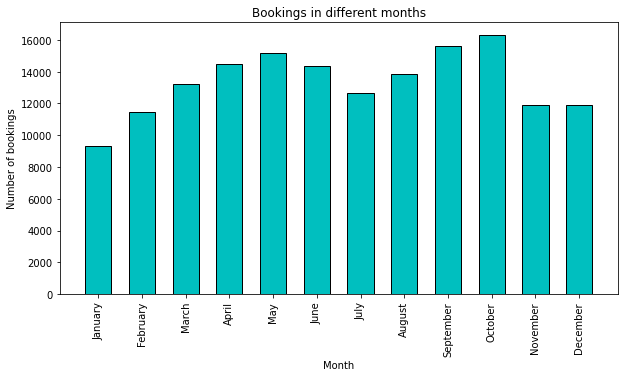

In [38]:
#plotting a bar chart to show the total number of bookings in each month across all years.
plt.bar(modified_booking_by_time_of_the_year['arrival_date_month'],modified_booking_by_time_of_the_year['total'],color='c',edgecolor='black',width=0.6)
plt.title('Bookings in different months')
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.xticks(rotation='vertical')




In [44]:
#to find the top 10 countries,where the booking has been made from.
#NA values are replaced by 'Unknown'
top_10_countries=df.fillna(value={'country':'Unknown'})['country'].value_counts().reset_index().rename(columns={'index':'country','country':'booking'}).head(10)
top_10_countries



,country,booking
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
5,ITA,3766
6,IRL,3375
7,BEL,2342
8,BRA,2224
9,NLD,2104


Text(0, 0.5, 'Number of bookings')

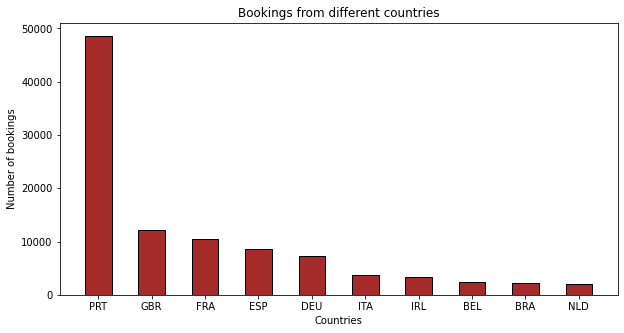

In [48]:
#plotting the top 10 countries on a bar plot.
plt.bar(top_10_countries['country'],top_10_countries['booking'],width=0.5,color='brown',edgecolor='black')
plt.title('Bookings from different countries')
plt.xlabel('Countries')
plt.ylabel('Number of bookings')

Text(0.5, 1.0, 'Percentage of bookings from different countries')

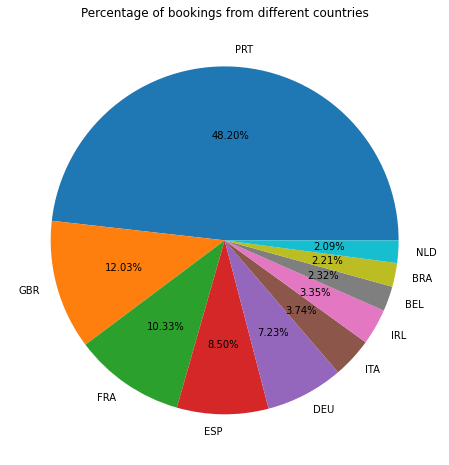

In [48]:
#plottong the above data in a pie chart.
plt.figure(figsize=(8,8))
plt.pie(top_10_countries['booking'],labels=top_10_countries['country'],autopct='%1.2f%%')
plt.title('Percentage of bookings from different countries')

The hotels had disproportionately high number of bookings from Portugal followed by Great Britain,France,Spain and Germany.

In [49]:
#To find the number of bookings made to different types of rooms.
room_type=df['reserved_room_type'].value_counts().reset_index().rename(columns={'index':'room type','reserved_room_type':'bookings'})
room_type

,room type,bookings
0,A,85994
1,D,19201
2,E,6535
3,F,2897
4,G,2094
5,B,1118
6,C,932
7,H,601
8,P,12
9,L,6




*   Almost 75% of the total bookings have been made to room type 'A'
*   Room type 'D' comes at the second position with less one-fifth of the total bookings.
*All the other types of rooms are booked not a lot times when compared with these.



In [50]:
#To find the trend in room type preference at different months.
room_type_by_month=df.groupby(['arrival_date_month','reserved_room_type'])['reserved_room_type'].count().unstack().fillna(0)
room_type_by_month=room_type_by_month.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
room_type_by_month

reserved_room_type,A,B,C,D,E,F,G,H,L,P
arrival_date_month,,,,,,,,,,
January,4644.0,80.0,16.0,657.0,291.0,128.0,87.0,26.0,0.0,0.0
February,6091.0,87.0,44.0,1098.0,405.0,177.0,127.0,38.0,0.0,1.0
March,7114.0,93.0,40.0,1626.0,560.0,191.0,146.0,24.0,0.0,0.0
April,7727.0,90.0,58.0,2005.0,702.0,292.0,171.0,40.0,0.0,4.0
May,8311.0,52.0,61.0,2203.0,648.0,262.0,210.0,44.0,0.0,0.0
June,7895.0,55.0,112.0,1821.0,526.0,261.0,198.0,71.0,0.0,0.0
July,8197.0,153.0,213.0,2385.0,902.0,364.0,335.0,108.0,4.0,0.0
August,8920.0,173.0,267.0,2657.0,902.0,487.0,357.0,110.0,2.0,2.0
September,8080.0,63.0,43.0,1422.0,461.0,231.0,163.0,45.0,0.0,0.0


Text(0, 0.5, 'Number of bookings')

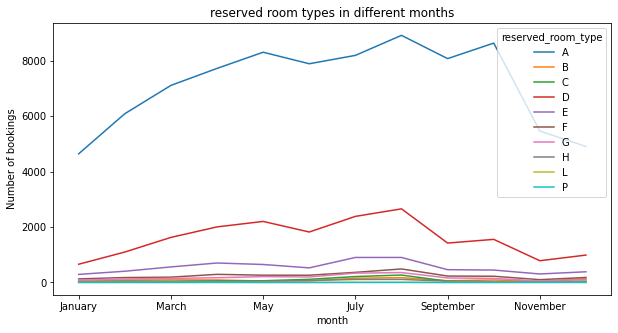

In [52]:
# plotting the trend in room type preference at different months.
room_type_by_month.plot()
plt.title('reserved room types in different months')
plt.xlabel('month')
plt.ylabel('Number of bookings')






The room type A is prefered by most number of people followed by type D and type E.Each of these types follows almost similar contours.

In [53]:
#To find number of adults in each booking.
df['adults'].value_counts().reset_index().rename(columns={'index':'adults','adults':'bookings'})


,adults,bookings
0,2,89680
1,1,23027
2,3,6202
3,0,403
4,4,62
5,26,5
6,27,2
7,20,2
8,5,2
9,55,1


Around 75% of the bookings consist of two adults.

In [55]:
#To find number of bookings on different days of month across all years.
df.groupby('arrival_date_day_of_month')['hotel'].count().reset_index().rename(columns={'index':'arrival_date_day_of_month','hotel':'bookings'})

,arrival_date_day_of_month,bookings
0,1,3626
1,2,4055
2,3,3855
3,4,3763
4,5,4317
5,6,3833
6,7,3665
7,8,3921
8,9,4096
9,10,3575


In [56]:
#To find number of stays in week mights and weekend nights.
week_and_weekend_stay=df[['stays_in_weekend_nights','stays_in_week_nights']].sum().reset_index().rename(columns={'index':'time of week',0:'stays'})
week_and_weekend_stay

,time of week,stays
0,stays_in_weekend_nights,110746
1,stays_in_week_nights,298511


Text(0.5, 0, 'Nights of stay')

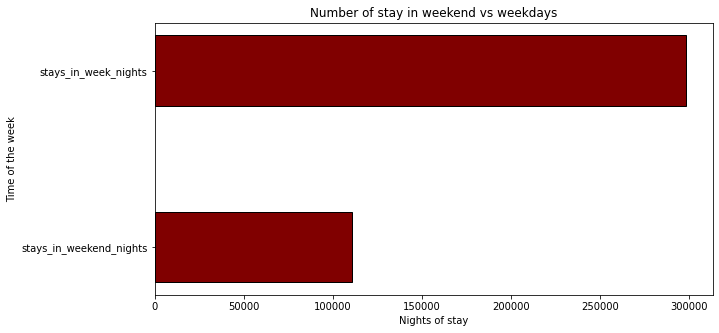

In [58]:
#Plotting number of week night and weekend nights on a bar chart.
plt.barh(week_and_weekend_stay['time of week'],week_and_weekend_stay['stays'],color='maroon',edgecolor='black',height=0.4)
plt.title('Number of stay in weekend vs weekdays')
plt.ylabel('Time of the week')
plt.xlabel('Nights of stay')


In [59]:
#creating a new column for total number of people in each booking.
df['total_persons']=df['adults']+df['children']+df['babies']

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_persons
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [60]:
#To find total number of people stayed in the hotel from each countries.
df.groupby('country')['total_persons'].sum().reset_index().sort_values('total_persons',ascending=False,ignore_index=True)

,country,total_persons
0,PRT,90027.0
1,GBR,24568.0
2,FRA,21579.0
3,ESP,18153.0
4,DEU,14198.0
...,...,...
172,SLE,2.0
173,MDG,2.0
174,PLW,2.0
175,GUY,1.0


In [62]:
#To find number of bookings made through different market segments
bookings_by_market_segment=df.groupby('market_segment')['hotel'].count().reset_index().rename(columns={'hotel':'bookings'})
bookings_by_market_segment



,market_segment,bookings
0,Aviation,237
1,Complementary,743
2,Corporate,5295
3,Direct,12606
4,Groups,19811
5,Offline TA/TO,24219
6,Online TA,56477
7,Undefined,2


Text(0, 0.5, 'Number of bookings')

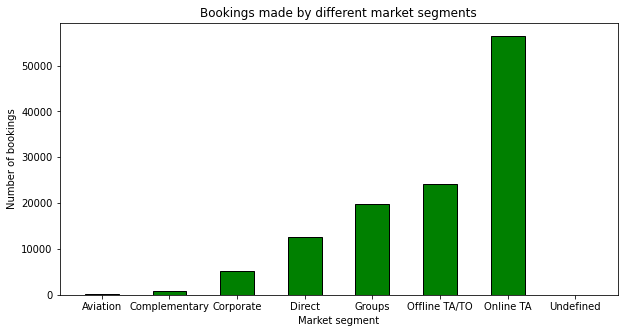

In [63]:
#Plotting bookings made through different market segments on a bar chart.
plt.bar(bookings_by_market_segment['market_segment'],bookings_by_market_segment['bookings'],width=0.5,color='green',edgecolor='black')
plt.title('Bookings made by different market segments')
plt.xlabel('Market segment')
plt.ylabel('Number of bookings')




*   Most of the bookings where made by onlline travel agencies
*   Offline travel agencies,groups and direct bookings comes in second,third and fourth position respectively in terms of number of bookings made



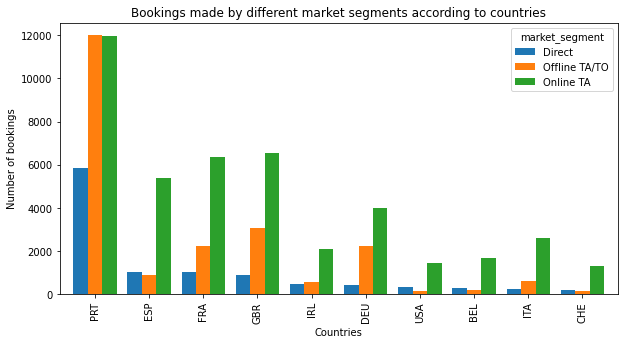

In [66]:
#Plotting bookings made through three main market segments by different countries' 
market_segment_by_country=df.groupby(['country','market_segment'])['market_segment'].count().unstack().sort_values('Direct',ascending=False).head(10)
market_segment_by_country[['Direct','Offline TA/TO','Online TA']].plot(kind='bar',width=0.8)
plt.title('Bookings made by different market segments according to countries')
plt.xlabel('Countries')
plt.ylabel('Number of bookings')
plt.rcParams['figure.figsize'] = (10, 5)


Online travel agencies exceeds offline travel agencies and direct booking by far except for Portugal,in which online travel agencies and offline travel agencies are almost equal.

In [67]:
#To find number of cancelled bookings.
cancellation=df['is_canceled'].value_counts().reset_index().rename(columns={'index':'cancellation status','is_canceled':'number'})
cancellation

,cancellation status,number
0,0,75166
1,1,44224


In [68]:
#To find percentage of bookings which are cancelled.
percentage_cancellation=round(cancellation.loc[1]['number']/(cancellation.loc[0]['number']+cancellation.loc[1]['number']),4)*100
percentage_cancellation

37.04

37.04 percent of the total bookings made were cancelled.

In [69]:
#To find cancellation in different hotel types.
cancellation_by_hotel_type=df.groupby('hotel')['is_canceled'].sum().reset_index().rename(columns={'is_canceled':'cancellations'})
cancellation_by_hotel_type

,hotel,cancellations
0,City Hotel,33102
1,Resort Hotel,11122


In [70]:
#To find percentage of bookings cancelled in different type of hotels.
booking_and_cancellation=pd.merge(booking_by_hotel_type,cancellation_by_hotel_type,left_on='Hotel',right_on='hotel',how='inner').drop(labels='hotel',axis=1).rename(columns={'Count':'Bookings'})
booking_and_cancellation['cancellation_percentage']=round(booking_and_cancellation['cancellations']/booking_and_cancellation['Bookings'],2)*100
booking_and_cancellation

,Hotel,Bookings,cancellations,cancellation_percentage
0,City Hotel,79330,33102,42.0
1,Resort Hotel,40060,11122,28.0


Text(0, 0.5, 'Number of bookings and cancellations')

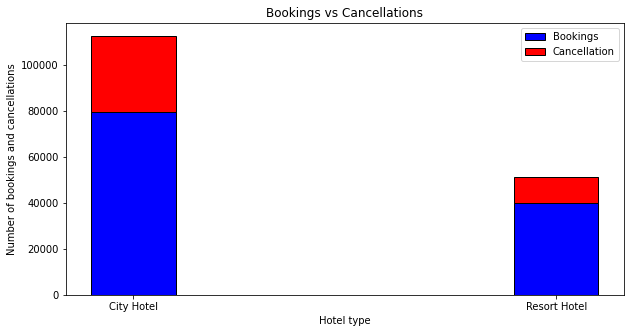

In [71]:
#Plotting bookings and cancellation for different types of hotel on a stacked bar chart.
plt.bar(booking_and_cancellation['Hotel'],booking_and_cancellation['Bookings'],color='blue',width=0.2,edgecolor='black')
plt.bar(booking_and_cancellation['Hotel'],booking_and_cancellation['cancellations'],bottom=booking_and_cancellation['Bookings'],color='red',width=0.2,edgecolor='black')
plt.legend(['Bookings','Cancellation'])
plt.title('Bookings vs Cancellations')
plt.xlabel('Hotel type')
plt.ylabel('Number of bookings and cancellations')



In [72]:
#To find number of cancellation for bookings made through different market segments.
cancellation_by_market_segments=df.groupby(['market_segment','is_canceled'])['is_canceled'].count().unstack().rename(columns={0:'not cancelled',1:'cancelled'}).fillna(0)
cancellation_by_market_segments

is_canceled,not cancelled,cancelled
market_segment,,
Aviation,185.0,52.0
Complementary,646.0,97.0
Corporate,4303.0,992.0
Direct,10672.0,1934.0
Groups,7714.0,12097.0
Offline TA/TO,15908.0,8311.0
Online TA,35738.0,20739.0
Undefined,0.0,2.0


In [73]:
#Creating a combined data set for bookings and cancellation for different market segments.
market_segment_booking_and_cancellation=cancellation_by_market_segments.merge(bookings_by_market_segment,on='market_segment',how='inner')
market_segment_booking_and_cancellation

,market_segment,not cancelled,cancelled,bookings
0,Aviation,185.0,52.0,237
1,Complementary,646.0,97.0,743
2,Corporate,4303.0,992.0,5295
3,Direct,10672.0,1934.0,12606
4,Groups,7714.0,12097.0,19811
5,Offline TA/TO,15908.0,8311.0,24219
6,Online TA,35738.0,20739.0,56477
7,Undefined,0.0,2.0,2


In [74]:
#Finding the percentage of bookings cancelled for different market segments.
market_segment_booking_and_cancellation['percentage_cancellation']=round(market_segment_booking_and_cancellation['cancelled']/market_segment_booking_and_cancellation['bookings'],4)*100
market_segment_booking_and_cancellation

,market_segment,not cancelled,cancelled,bookings,percentage_cancellation
0,Aviation,185.0,52.0,237,21.94
1,Complementary,646.0,97.0,743,13.06
2,Corporate,4303.0,992.0,5295,18.73
3,Direct,10672.0,1934.0,12606,15.34
4,Groups,7714.0,12097.0,19811,61.06
5,Offline TA/TO,15908.0,8311.0,24219,34.32
6,Online TA,35738.0,20739.0,56477,36.72
7,Undefined,0.0,2.0,2,100.00


Text(0, 0.5, 'Percentage of cancellation')

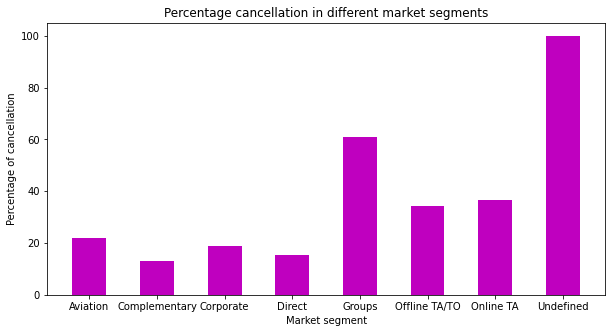

In [75]:
#Plotting percentage of cancellation for different market segments.
plt.bar(market_segment_booking_and_cancellation['market_segment'],market_segment_booking_and_cancellation['percentage_cancellation'],width=0.5,color='m')
plt.title('Percentage cancellation in different market segments')
plt.xlabel('Market segment')
plt.ylabel('Percentage of cancellation')

In [76]:
#To find number of bookings made by different agents.
booking_by_agent=df['agent'].value_counts().reset_index().rename(columns={'index':'agent','agent':'bookings'})
booking_by_agent

,agent,bookings
0,9.0,31961
1,240.0,13922
2,1.0,7191
3,14.0,3640
4,7.0,3539
...,...,...
328,213.0,1
329,433.0,1
330,197.0,1
331,367.0,1


In [77]:
#To find number of cancellation made by different agents.
cancellation_by_agent=df[df['is_canceled']==1]['agent'].value_counts().reset_index().rename(columns={'index':'agent','agent':'cancellations'})
cancellation_by_agent

,agent,cancellations
0,9.0,13264
1,240.0,5484
2,1.0,5280
3,6.0,1025
4,19.0,780
...,...,...
212,139.0,1
213,483.0,1
214,411.0,1
215,244.0,1


In [78]:
#Combining the booking and cancellation data for different agents.
booking_and_cancellation_by_agent=pd.merge(booking_by_agent,cancellation_by_agent,how='left',on='agent').fillna(0)
booking_and_cancellation_by_agent


,agent,bookings,cancellations
0,9.0,31961,13264.0
1,240.0,13922,5484.0
2,1.0,7191,5280.0
3,14.0,3640,652.0
4,7.0,3539,474.0
...,...,...,...
328,213.0,1,0.0
329,433.0,1,0.0
330,197.0,1,0.0
331,367.0,1,0.0


In [79]:
#Finding the percentage of cancellation made by different agents.
booking_and_cancellation_by_agent['percentage_cancellation']=round(booking_and_cancellation_by_agent['cancellations']/booking_and_cancellation_by_agent['bookings'],4)*100
top_10_agents=booking_and_cancellation_by_agent.sort_values('bookings',ascending=False,ignore_index=True).head(10)
top_10_agents

,agent,bookings,cancellations,percentage_cancellation
0,9.0,31961,13264.0,41.50
1,240.0,13922,5484.0,39.39
2,1.0,7191,5280.0,73.43
3,14.0,3640,652.0,17.91
4,7.0,3539,474.0,13.39
5,6.0,3290,1025.0,31.16
6,250.0,2870,513.0,17.87
7,241.0,1721,236.0,13.71
8,28.0,1666,110.0,6.60
9,8.0,1514,427.0,28.20


There is a high cancellation rate for some agents.

Text(0, 0.5, 'Bookings and cancellations')

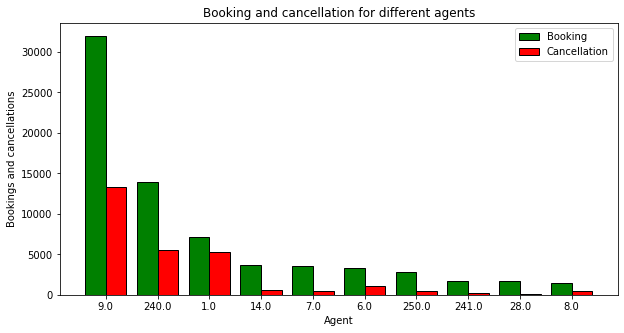

In [80]:
#plotting number of bookings and cancellation made by different agents on a bar chart.
x=np.arange(10)
width=0.4
plt.bar(x,top_10_agents['bookings'],width=width,color='g',label='Booking',edgecolor='black')
plt.bar(x+width,top_10_agents['cancellations'],width=width,color='r',label='Cancellation',edgecolor='black')
plt.xticks(x+width/2,top_10_agents['agent'])
plt.title('Booking and cancellation for different agents')
plt.xlabel('Agent')
plt.legend()
plt.ylabel('Bookings and cancellations')



In [81]:
#finding average daily rates greater than thousand.
df[df['adr']>1000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_persons
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19,2.0


In [82]:
# dropping the entry with adr greater than thousant as erroneos or exceptinal case
new_df=df.drop(48515)

In [33]:
new_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_persons
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119385.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,103049.000000,6797.000000,119389.000000,119389.000000,119389.000000,119389.000000,119385.000000
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.103891,0.007949,0.031912,0.087119,0.137098,0.221118,86.694107,189.266735,2.321169,101.786744,0.062518,0.571368,1.968229
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.398563,0.097437,0.175768,0.844340,1.497443,0.652304,110.774841,131.655015,17.594793,48.153554,0.245292,0.792800,0.722403
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.560000,0.000000,0.000000,2.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,55.000000


In [83]:
#To find average adr and average number of adults for different room types.
room_type_and_adr=new_df.groupby('reserved_room_type')['adr','adults'].mean().reset_index().rename(columns={'adr':'average adr'})
room_type_and_adr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,reserved_room_type,average adr,adults
0,A,90.734918,1.781098
1,B,90.360447,1.569767
2,C,160.216792,2.039700
3,D,120.682882,2.088902
4,E,124.540179,1.980260
5,F,167.689651,1.992406
6,G,175.996027,2.077841
7,H,188.223111,2.712146
8,L,124.666667,2.166667
9,P,0.000000,0.000000


Room type 'A' and 'B' have the lowest average adr and room type 'H' has the highest average adr.

In [84]:
#To find average adr for different type of hotels.
new_df.groupby('hotel')['adr'].mean().reset_index().rename(columns={'adr':'average adr'})

,hotel,average adr
0,City Hotel,105.237722
1,Resort Hotel,94.952930


Text(0, 0.5, 'Average adr and population')

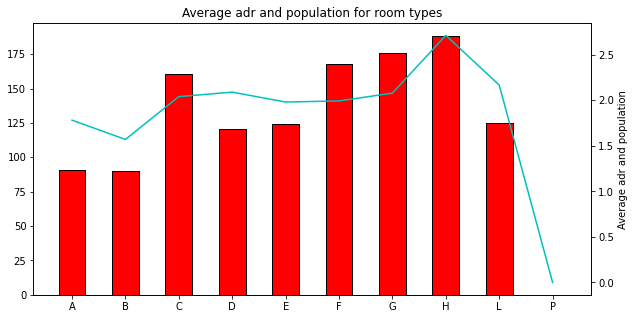

In [87]:
#plotting the average adr and average number of adults for different room types.
plt.bar(room_type_and_adr['reserved_room_type'],room_type_and_adr['average adr'],width=0.5,color='r',label='average adr',edgecolor='black')
room_type_and_adr['adults'].plot(secondary_y=True,color='c')
plt.title('Average adr and population for room types')
plt.xlabel('Room type')
plt.ylabel('Average adr and population')


In [88]:
#Finding average adr for different months.
new_df[new_df['reserved_room_type']=='A'].groupby('arrival_date_month')['adr'].mean().reindex(['January','February','March','April','May','June','July','August','September','October','November','December']).reset_index().rename(columns={'adr':'average adr'})

,arrival_date_month,average adr
0,January,66.440646
1,February,67.999475
2,March,74.236730
3,April,91.429340
4,May,100.068101
5,June,107.256526
6,July,106.897709
7,August,116.025839
8,September,97.405611
9,October,82.747949


January has the lowest average adr and August has the highest average adr.

In [89]:
#creating a new column for total number of stay nights.
new_df['total_stay']=new_df['stays_in_week_nights']+new_df['stays_in_weekend_nights'] 
new_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_persons,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2


In [90]:
#To find average adr for different assigned room types.
assigned_room_type_and_adr=new_df.groupby('assigned_room_type')['adr','adults'].mean().reset_index().rename(columns={'adr':'average adr'})
assigned_room_type_and_adr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,assigned_room_type,average adr,adults
0,A,93.070683,1.789999
1,B,94.450264,1.659732
2,C,113.423583,1.981895
3,D,107.453633,1.983374
4,E,117.704224,1.945427
5,F,151.889931,1.960277
6,G,166.530309,2.039561
7,H,171.380772,2.566011
8,I,40.843774,1.798898
9,K,53.698889,1.193548


In [91]:
#To find the average adr for differnt total stay nights for room type 'A'
total_stay_vs_adr_A=new_df[(new_df['assigned_room_type']=='A')].groupby('total_stay')['adr'].mean().reset_index().rename(columns={'adr':'average adr A'}).sort_values('average adr A',ignore_index=True)
total_stay_vs_adr_A

,total_stay,average adr A
0,0,0.000000
1,42,22.110000
2,56,27.145000
3,35,36.930000
4,23,41.371667
5,28,48.847778
6,25,57.836667
7,30,59.322857
8,29,61.217500
9,18,65.175714


In [92]:
#To find the average adr for differnt total stay nights for room type 'D'
total_stay_vs_adr_D=new_df[(new_df['assigned_room_type']=='D')].groupby('total_stay')['adr'].mean().reset_index().rename(columns={'adr':'average adr D'}).sort_values('average adr D',ignore_index=True)
total_stay_vs_adr_D

,total_stay,average adr D
0,0,0.000000
1,42,35.520000
2,35,39.150000
3,45,42.110000
4,28,56.867143
5,33,77.000000
6,21,78.207333
7,18,78.950000
8,25,86.390000
9,22,88.287500


In [93]:
#combining data for toatal stay nights and average adr for two popular room types('A' & 'D')
total_stay_vs_adr=pd.merge(total_stay_vs_adr_A,total_stay_vs_adr_D,how='outer',on='total_stay')
total_stay_vs_adr

,total_stay,average adr A,average adr D
0,0,0.000000,0.000000
1,42,22.110000,35.520000
2,56,27.145000,NaN
3,35,36.930000,39.150000
4,23,41.371667,NaN
5,28,48.847778,56.867143
6,25,57.836667,86.390000
7,30,59.322857,110.593333
8,29,61.217500,109.086000
9,18,65.175714,78.950000


In [94]:
#To find count of different stay nights.
stay_count_df=new_df[(new_df['assigned_room_type']=='A')|(new_df['assigned_room_type']=='D')]['total_stay'].value_counts().reset_index().rename(columns={'index':'total_stay','total_stay':'count'})
stay_count_df

,total_stay,count
0,2,24165
1,3,23726
2,1,17057
3,4,14707
4,7,6451
5,5,6260
6,6,2982
7,8,831
8,10,792
9,14,662


In [95]:
#selecting only those saty nights which have more than 100 entries.
relevent_stay_count_df=stay_count_df[stay_count_df['count']>100]
relevent_stay_count_df

,total_stay,count
0,2,24165
1,3,23726
2,1,17057
3,4,14707
4,7,6451
5,5,6260
6,6,2982
7,8,831
8,10,792
9,14,662


In [96]:
#merging total stay Vs average adr data find optimal length of stay.
optimal_length_of_stay=pd.merge(relevent_stay_count_df,total_stay_vs_adr,how='left',on='total_stay').sort_values('total_stay',ignore_index=True).drop(0)
optimal_length_of_stay

,total_stay,count,average adr A,average adr D
1,1,17057,90.414349,88.537443
2,2,24165,90.304824,107.858305
3,3,23726,96.797271,114.552112
4,4,14707,94.293790,113.713503
5,5,6260,100.788754,119.649867
6,6,2982,104.490790,128.757158
7,7,6451,88.465057,104.382276
8,8,831,95.763541,115.155242
9,9,557,97.914642,120.336971
10,10,792,88.615695,107.270907


Text(0, 0.5, 'Average adr')

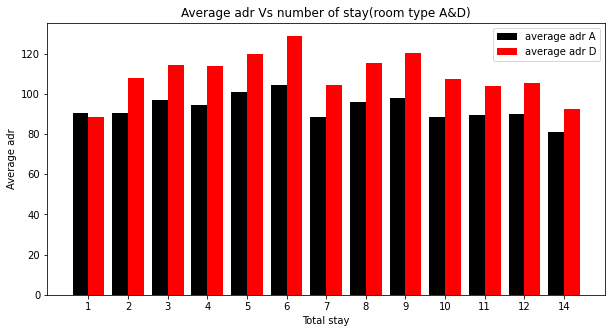

In [97]:
#plotting average adr for room type 'A' and 'D' for different total stay nights on a bar chart.
x=np.arange(13)
width=0.4
plt.bar(x,optimal_length_of_stay['average adr A'],width=width,color='black',label='average adr A')
plt.bar(x+width,optimal_length_of_stay['average adr D'],width=width,color='r',label='average adr D')
plt.xticks(x+width/2,optimal_length_of_stay['total_stay'])
plt.title('Average adr Vs number of stay(room type A&D)')
plt.xlabel('Total stay')
plt.legend()
plt.ylabel('Average adr')





*   Optimal length of stay for room type 'A' is 14 nights.
*   Optimal length of stay for room type 'D' is 1 night followed by 14 nights.



In [98]:
#To correlate between number of babies and special requests.
special_request_and_babies=df.groupby('babies')['total_of_special_requests'].sum().reset_index().merge(df.groupby('babies')['hotel'].count().reset_index().rename(columns={'hotel':'bookings'}),how='inner',on='babies')
special_request_and_babies

,babies,total_of_special_requests,bookings
0,0,66807,118473
1,1,1379,900
2,2,28,15
3,9,0,1
4,10,1,1


In [99]:
#To find special request per bookings for bookings with different number of babies.
special_request_and_babies['request per booking']=round(special_request_and_babies['total_of_special_requests']/special_request_and_babies['bookings'],2)
special_request_and_babies

,babies,total_of_special_requests,bookings,request per booking
0,0,66807,118473,0.56
1,1,1379,900,1.53
2,2,28,15,1.87
3,9,0,1,0.00
4,10,1,1,1.00


Likely to get a special request in bookings with babies.

In [100]:
#To find number of special request for bookings made in different months.
special_request_Vs_month=df.groupby('arrival_date_month')['total_of_special_requests'].sum().reindex(['January','February','March','April','May','June','July','August','September','October','November','December']).reset_index()
special_request_Vs_month

,arrival_date_month,total_of_special_requests
0,January,3246
1,February,4241
2,March,4872
3,April,5783
4,May,6280
5,June,6169
6,July,8505
7,August,10223
8,September,5268
9,October,5516


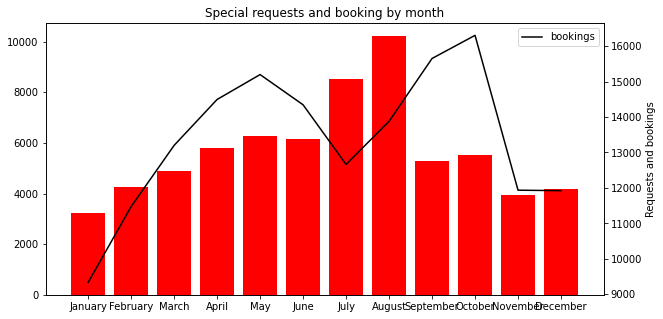

In [101]:
#Plotting total number of bookings and special requests for each month.
plt.bar(special_request_Vs_month['arrival_date_month'],special_request_Vs_month['total_of_special_requests'],color='r',label='requests')
modified_booking_by_time_of_the_year['total'].plot(secondary_y=True,color='black',label='bookings')
plt.title('Special requests and booking by month')
plt.xlabel('Month')
plt.ylabel('Requests and bookings')
plt.xticks(rotation=30)
plt.legend()



July and August see disproportionate number of special requests.